In [1]:
#readme- when everything is exported from siRNA tools, make sure everything is clicked except for individual categories!!!!

import csv
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
results=[]
categories=["Assembly","Alignment", "UMIs","Quantification","Quality Control","Normalisation","Imputation","Integration","Gene Filtering","Clustering","Classification","Ordering","Differential Expression","Marker Genes","Expression Patterns","Variable Genes","Gene Sets","Gene Networks","Cell Cycle","Dimensionality Reduction","Transformation","Modality","Alternative Splicing","Rare Cells", "Stem Cells","Immune","Variants","Haplotypes","Allele Specific","Perturbations","Visualisation","Interactive","Simulation"]


#definitions/functions
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])
                 
#clustering using gini index function       
#takes two tools (in dict form) and calculates gini index of shared categories/total categories
def calculateGini(tool1, tool2):
    sharedCategories=0
    
    for category in categories:
        if category in tool1["Categories"] and category in tool2["Categories"]:
            sharedCategories+=1
    
    GiniIndex= sharedCategories/len(categories)
    return GiniIndex



#converts csv file and stores it into a list of key value pair dictionaries
with open("tableExport.csv",encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        addThis={}
        addThis["Name"]=row[0]
        addThis["Platform"]=row[1]
        addThis["DOIs"]=row[2]
        addThis["Pub Dates"]=row[3].replace(" ","")
        addThis["Citations"]=row[4]
        addThis["Code"]=row[5]
        addThis["Description"]=row[6]
        addThis["License"]=row[7]
        addThis["Categories"]=row[8]
        addThis["Added"]=row[9]
        addThis["Updated"]=row[10]
        
        #######
        #finding earliest publication date
        dateList=addThis["Pub Dates"].split(",")
        cleanDateList=[]
        for date in dateList:
            if "NA" not in date and "PubDates" not in date and date!="":
                if date.count("-")==2:
                    cleanDateList.append(datetime.strptime(date,"%Y-%m-%d"))
                elif date.count("-")==1:
                    cleanDateList.append(datetime.strptime(date,"%Y-%m"))
        addThis["Clean Pub Dates"]= cleanDateList
        if cleanDateList:
            addThis["Earliest Pub"]= min(cleanDateList)
            addThis["Latest Pub"]=max(cleanDateList)
        ########
        
        results.append(addThis)

results.pop(0)  #removes the first kvp dictionairy in the array which is a header (unnecessary header)
print(results)

[{'Name': 'acorde', 'Platform': 'R', 'DOIs': '10.1038/s41467-022-29497-w, 10.1101/2021.05.07.441841', 'Pub Dates': '2022-04-05,NA', 'Citations': '1', 'Code': 'https://github.com/ConesaLab/acorde', 'Description': 'Isoform co-usage networks from single-cell RNA-seq data', 'License': 'GPL-3.0', 'Categories': 'Alternative Splicing, Differential Expression, Visualisation', 'Added': '2021-05-14', 'Updated': '2022-04-30', 'Clean Pub Dates': [datetime.datetime(2022, 4, 5, 0, 0)], 'Earliest Pub': datetime.datetime(2022, 4, 5, 0, 0), 'Latest Pub': datetime.datetime(2022, 4, 5, 0, 0)}, {'Name': 'ACTINN', 'Platform': 'Python', 'DOIs': '10.1093/bioinformatics/btz592, 10.1101/532093', 'Pub Dates': '2019-07-29,NA', 'Citations': '22', 'Code': 'https://github.com/mafeiyang/ACTINN', 'Description': 'ACTINN (Automated Cell Type Identification using Neural Networks) is a bioinformatic tool to quickly and accurately identify cell types in scRNA-Seq.', 'License': 'GPL-3.0', 'Categories': 'Classification', 'A

In [2]:
#counting citations per categories
categories=["Assembly","Alignment", "UMIs","Quantification","Quality Control","Normalisation","Imputation","Integration","Gene Filtering","Clustering","Classification","Ordering","Differential Expression","Marker Genes","Expression Patterns","Variable Genes","Gene Sets","Gene Networks","Cell Cycle","Dimensionality Reduction","Transformation","Modality","Alternative Splicing","Rare Cells", "Stem Cells","Immune","Variants","Haplotypes","Allele Specific","Perturbations","Visualisation","Interactive","Simulation"]
categoryCount=[]
categoryCountDict={}


for category in categories:
    addThis={}
    catCount=0
    for item in results:
        if category in item["Categories"]:
            if item["Citations"]!="'-":
                catCount+=int(item["Citations"])
    categoryCount.append(catCount)
    categoryCountDict[category]=catCount
    print(category+ " : " + str(catCount))

print(categoryCountDict)

Assembly : 537
Alignment : 25607
UMIs : 35561
Quantification : 36642
Quality Control : 13120
Normalisation : 27949
Imputation : 20301
Integration : 26327
Gene Filtering : 20693
Clustering : 40398
Classification : 6931
Ordering : 19273
Differential Expression : 33145
Marker Genes : 28172
Expression Patterns : 8907
Variable Genes : 21747
Gene Sets : 4511
Gene Networks : 8993
Cell Cycle : 3322
Dimensionality Reduction : 40261
Transformation : 173
Modality : 237
Alternative Splicing : 2292
Rare Cells : 1601
Stem Cells : 1590
Immune : 988
Variants : 3989
Haplotypes : 20
Allele Specific : 376
Perturbations : 1110
Visualisation : 62421
Interactive : 10688
Simulation : 6762
{'Assembly': 537, 'Alignment': 25607, 'UMIs': 35561, 'Quantification': 36642, 'Quality Control': 13120, 'Normalisation': 27949, 'Imputation': 20301, 'Integration': 26327, 'Gene Filtering': 20693, 'Clustering': 40398, 'Classification': 6931, 'Ordering': 19273, 'Differential Expression': 33145, 'Marker Genes': 28172, 'Express

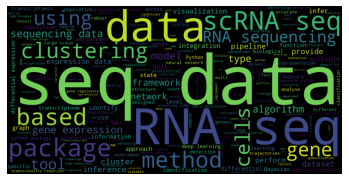

In [3]:
#creating wordcloud from all the descriptions

#stopwords, words that are removed from wordcloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["single cell", "analysis","single","cell"])


allDesc=""
for item in results:
    allDesc+=item["Description"]+ " "
    
#print(allDesc)


wordcloud = WordCloud(stopwords=stopwords, width = 2000, height = 1000).generate(allDesc)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



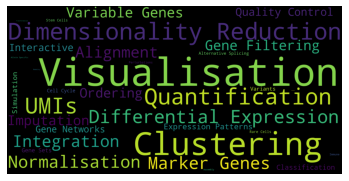

In [4]:
#creating word cloud from citations per category

wordcloud = WordCloud(width = 2000, height = 1000).generate(allDesc)

wordcloud.generate_from_frequencies(categoryCountDict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

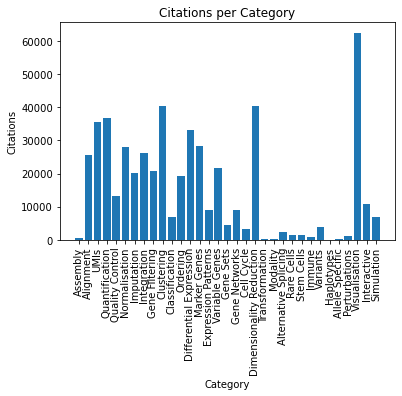

In [5]:
#creating bar graph of citations per category
plt.bar(categories,categoryCount)
plt.title('Citations per Category')
plt.xlabel('Category')
plt.ylabel('Citations')
plt.xticks(rotation=90)
plt.show()



In [6]:
#creating plot with number of categories per tool
cateCountList=[]
for item in results:
    commaCount=item["Categories"].count(",")
    #calculating number of categories from comma count
    if commaCount==0:
        categoryCount=1
    else:
        categoryCount=commaCount+1
    
    if categoryCount>=7: #arbitrarily set at 7
        #print(item["Name"]+" : " + item["Categories"])
        print(item["Name"])
        
    
    cateCountList.append(categoryCount)
    




ACTIONet
adobo
AltAnalyze
Asc-Seurat
ascend
BESCA
bigSCale2
BingleSeq
bollito
ccfindR
celda
CellRanger
CellRouter
DESC
DIscBIO
DrSeq2
fusca
GenePattern
Granatum
iCellR
iS-CellR
kana
Linnorm
MAESTRO
Monocle
MUDAN
pagoda2
Pegasus
phyloRNA
PIVOT
RaceID
rCASC
RNA-combine
sake
SAM
scAmpi
Scanpy
scarf
scCancer
SCell
scEpath
scFlow
scGEAToolbox
scMiko
SCRAT
scSeqR
scvi-tools
Seurat
SeuratV3Wizard
SeuratWizard
SingCellaR
singleCellTK
Spectre
URD
WASP


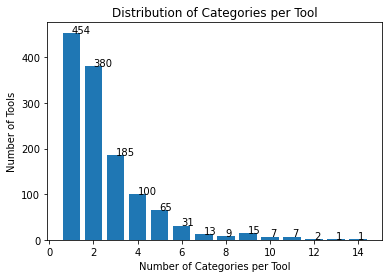

In [7]:
#graphing the plot
uniqueCategory = list(set(cateCountList)) #creates unique categories for each number
counts = [cateCountList.count(value) for value in uniqueCategory] #corresponding count for each unique value


plt.bar(uniqueCategory,counts)
plt.title('Distribution of Categories per Tool')
plt.xlabel('Number of Categories per Tool')
plt.ylabel('Number of Tools')
add_value_label(uniqueCategory,counts)
plt.show()

In [8]:

#clustering using gini index 
categories=["Assembly","Alignment", "UMIs","Quantification","Quality Control","Normalisation","Imputation","Integration","Gene Filtering","Clustering","Classification","Ordering","Differential Expression","Marker Genes","Expression Patterns","Variable Genes","Gene Sets","Gene Networks","Cell Cycle","Dimensionality Reduction","Transformation","Modality","Alternative Splicing","Rare Cells", "Stem Cells","Immune","Variants","Haplotypes","Allele Specific","Perturbations","Visualisation","Interactive","Simulation"]

#takes two tools (in dict form) and calculates gini index of shared categories/total categories
def calculateGini(tool1, tool2):
    sharedCategories=0
    
    for category in categories:
        if category in tool1["Categories"] and category in tool2["Categories"]:
            sharedCategories+=1
    
    GiniIndex= sharedCategories/len(categories)
    return GiniIndex
        



In [9]:
#creating heat map
import numpy as np

i=0
j=0

#creating the matrix
#note- results[i] returns the whole kvp dictionairy
giniMatrix=[]
while i< len(results):
    addingRow=[]
    while j<len(results):
        gini=calculateGini(results[i],results[j])
        addingRow.append(gini)
        j+=1
    j=0
    giniMatrix.append(addingRow)
    i+=1

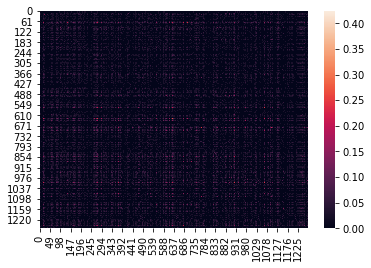

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
#converting 2d array to np array
giniNP=np.array(giniMatrix)
ax = sns.heatmap(giniNP)
plt.show()

In [11]:
for row in giniMatrix:
    print(row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.030303030303030304, 0.0, 0.06060606060606061, 0.09090909090909091, 0.0, 0.0, 0.0, 0.06060606060606061, 0.0, 0.09090909090909091, 0.0, 0.030303030303030304, 0.0, 0.0, 0.030303030303030304, 0.0, 0.09090909090909091, 0.0, 0.030303030303030304, 0.06060606060606061, 0.12121212121212122, 0.09090909090909091, 0.06060606060606061, 0.030303030303030304, 0.06060606060606061, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030303030303030304, 0.030303030303030304, 0.0, 0.030303030303030304, 0.0, 0.030303030303030304, 0.030303030303030304, 0.0, 0.0, 0.030303030303030304, 0.030303030303030304, 0.0, 0.0, 0.030303030303030304, 0.030303030303030304, 0.0, 0.030303030303030304, 0.030303030303030304, 0.0, 0.030303030303030304, 0.0, 0.0, 0.030303030303030304, 0.030303030303030304, 0.0, 0.0, 0.0, 0.06060606060606061, 0.09090909090909091, 0.0, 0.06060606060606061, 0.12121212121212122, 0.06060606060606061, 0.06060606060606061, 0.030303030303030304, 0.0, 0.030303030303030304, 0.0, 0.0, 0.030303030303030304, 0.1212121212121212

In [9]:
test1=results[3]
print(test1)
test2=results[2]
print(test2)

calculateGini(test1,test2)

{'Name': 'ACTIONet', 'Platform': 'R/C++', 'DOIs': '10.1038/s41467-020-18416-6, 10.1101/746339', 'Pub Dates': '2020-10-26,NA', 'Citations': '17', 'Code': 'https://github.com/shmohammadi86/ACTIONet', 'Description': 'Robust multi-resolution analysis of single-cell datasets', 'License': 'GPL-2.0-or-later', 'Categories': 'Classification, Clustering, Dimensionality Reduction, Gene Sets, Integration, Normalisation, Visualisation', 'Added': '2019-12-10', 'Updated': '2021-06-11', 'Clean Pub Dates': [datetime.datetime(2020, 10, 26, 0, 0)], 'Earliest Pub': datetime.datetime(2020, 10, 26, 0, 0), 'Latest Pub': datetime.datetime(2020, 10, 26, 0, 0)}
{'Name': 'ACTION', 'Platform': 'C++/R/MATLAB', 'DOIs': '10.1038/s41467-018-03933-2, 10.1101/081273', 'Pub Dates': '2018-04-17,NA', 'Citations': '35', 'Code': 'http://compbio.mit.edu/ACTION', 'Description': 'ACTION infers the functional identity of cells from their transcriptional profile, classifies them based on their dominant function, and reconstructs

0.06060606060606061

In [ ]:
## useful stuff up ^^^

In [50]:
testDate= results[5]
print(testDate)

{'Name': 'activeSVC', 'Platform': 'Python', 'DOIs': '10.1101/2021.06.15.448478', 'Pub Dates': 'NA', 'Citations': '1', 'Code': 'https://github.com/xqchen/activeSVC', 'Description': 'ActiveSVC selects features for large matrix data with reduced computational complexity or limited data acquisition. It approaches Sequential Feature Selection through an active learning strategy with a support vector machine classifier.', 'License': 'GPL-3.0', 'Categories': 'Marker Genes, Variable Genes', 'Added': '2022-02-18', 'Updated': '2022-02-18'}


In [64]:
#readme- when everything is exported from siRNA tools, make sure everything is clicked except for individual categories!!!!

import csv
from datetime import datetime
results=[]
#converts csv file and stores it into a list of key value pair dictionaries
with open("tableExport.csv",encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        addThis={}
        addThis["Name"]=row[0]
        addThis["Platform"]=row[1]
        addThis["DOIs"]=row[2]
        addThis["Pub Dates"]=row[3].replace(" ","")
        addThis["Citations"]=row[4]
        addThis["Code"]=row[5]
        addThis["Description"]=row[6]
        addThis["License"]=row[7]
        addThis["Categories"]=row[8]
        addThis["Added"]=row[9]
        addThis["Updated"]=row[10]
        
        #######
        #finding earliest publication date
        dateList=addThis["Pub Dates"].split(",")
        cleanDateList=[]
        for date in dateList:
            if "NA" not in date and "PubDates" not in date and date!="":
                if date.count("-")==2:
                    cleanDateList.append(datetime.strptime(date,"%Y-%m-%d"))
                elif date.count("-")==1:
                    cleanDateList.append(datetime.strptime(date,"%Y-%m"))
        addThis["Clean Pub Dates"]= cleanDateList
        if cleanDateList:
            addThis["Earliest Pub"]= min(cleanDateList)
            addThis["Latest Pub"]=max(cleanDateList)
        ########
        
        results.append(addThis)

results.pop(0)  #removes the first kvp dictionairy in the array which is a header (unnecessary header)
print(results)

[{'Name': 'acorde', 'Platform': 'R', 'DOIs': '10.1038/s41467-022-29497-w, 10.1101/2021.05.07.441841', 'Pub Dates': '2022-04-05,NA', 'Citations': '1', 'Code': 'https://github.com/ConesaLab/acorde', 'Description': 'Isoform co-usage networks from single-cell RNA-seq data', 'License': 'GPL-3.0', 'Categories': 'Alternative Splicing, Differential Expression, Visualisation', 'Added': '2021-05-14', 'Updated': '2022-04-30', 'Clean Pub Dates': [datetime.datetime(2022, 4, 5, 0, 0)], 'Earliest Pub': datetime.datetime(2022, 4, 5, 0, 0), 'Latest Pub': datetime.datetime(2022, 4, 5, 0, 0)}, {'Name': 'ACTINN', 'Platform': 'Python', 'DOIs': '10.1093/bioinformatics/btz592, 10.1101/532093', 'Pub Dates': '2019-07-29,NA', 'Citations': '22', 'Code': 'https://github.com/mafeiyang/ACTINN', 'Description': 'ACTINN (Automated Cell Type Identification using Neural Networks) is a bioinformatic tool to quickly and accurately identify cell types in scRNA-Seq.', 'License': 'GPL-3.0', 'Categories': 'Classification', 'A

In [36]:
#readme- when everything is exported from siRNA tools, make sure everything is clicked except for individual categories!!!!

import csv
from datetime import datetime
results=[]
#converts csv file and stores it into a list of key value pair dictionaries
with open("tableExport.csv",encoding="utf-8") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        addThis={}
        addThis["Name"]=row[0]
        addThis["Platform"]=row[1]
        addThis["DOIs"]=row[2]
        addThis["Pub Dates"]=row[3].replace(" ","")
        addThis["Citations"]=row[4]
        addThis["Code"]=row[5]
        addThis["Description"]=row[6]
        addThis["License"]=row[7]
        addThis["Categories"]=row[8]
        addThis["Added"]=row[9]
        addThis["Updated"]=row[10]
        
        results.append(addThis)

results.pop(0)  #removes the first kvp dictionairy in the array which is a header (unnecessary header)
print(results)

[{'Name': 'acorde', 'Platform': 'R', 'DOIs': '10.1038/s41467-022-29497-w, 10.1101/2021.05.07.441841', 'Pub Dates': '2022-04-05,NA', 'Citations': '1', 'Code': 'https://github.com/ConesaLab/acorde', 'Description': 'Isoform co-usage networks from single-cell RNA-seq data', 'License': 'GPL-3.0', 'Categories': 'Alternative Splicing, Differential Expression, Visualisation', 'Added': '2021-05-14', 'Updated': '2022-04-30'}, {'Name': 'ACTINN', 'Platform': 'Python', 'DOIs': '10.1093/bioinformatics/btz592, 10.1101/532093', 'Pub Dates': '2019-07-29,NA', 'Citations': '22', 'Code': 'https://github.com/mafeiyang/ACTINN', 'Description': 'ACTINN (Automated Cell Type Identification using Neural Networks) is a bioinformatic tool to quickly and accurately identify cell types in scRNA-Seq.', 'License': 'GPL-3.0', 'Categories': 'Classification', 'Added': '2019-02-01', 'Updated': '2021-06-28'}, {'Name': 'ACTION', 'Platform': 'C++/R/MATLAB', 'DOIs': '10.1038/s41467-018-03933-2, 10.1101/081273', 'Pub Dates': '